## PROBABILITY AND STATISTICS 1:2 ##
## GROUP ASSIGNMENT 3 MARKING GUIDE: 30 MARKS ##
* The codes used in this marking guide are not strictly the only way to answer the questions and alternative correct codes/graphs will be awarded marks
* Marks are awarded not just for results but for explanations too
* Marks will be deducted for having no name in your 
* The marking guide uses the dataset "Loan_Approval_Data.csv"

## Q1: What is the marginal probability of any continuous variable? [7 MARKS]

**A. Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats
from scipy.stats import chi2_contingency

**B. Import dataset as a pandas dataframe called "loan"**

In [3]:
loan = pd.read_csv("Loan_Approval_Data.csv")
#view dataframe information (shape and datatypes)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* The dataframe has 614 samples and 13 variables (7 categorical, 5 continuous and one identifier "Loan ID")


In [4]:
#Marginal probability of a continuous variable e.g. LoanAmount
bins = [9.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
labels = ['9 - 100', '100 - 200', '200 - 300', '300 - 400', '400 - 500', '500 - 600', '600 - 700']

#create new column to have the bin data

loan['LoanAmount_bin'] = pd.cut(loan['LoanAmount'], bins = bins, labels = labels, right =False)

#calculate the marginal probabilities

LoanAmount_probabilities = loan['LoanAmount_bin'].value_counts(normalize=True).sort_index()
print("The marginal probabilities for LoanAmount are: ", LoanAmount_probabilities)

The marginal probabilities for LoanAmount are:  LoanAmount_bin
9 - 100      0.235195
100 - 200    0.622673
200 - 300    0.093063
300 - 400    0.025381
400 - 500    0.015228
500 - 600    0.003384
600 - 700    0.005076
Name: proportion, dtype: float64


         Explanation: 
* The probability of getting a loan amount of 100-200 is highest at 62.26% and lowest at a higher amount of 600-700 (0.50%)

## Q2: What is the marginal probability of any categorical variable? [5 MARKS] ##

In [5]:
#Marginal probability of a categorical variable e.g Married

Married_probabilities = loan['Married'].value_counts()/len(loan)
print("The marginal probabilities for Married are: \n", Married_probabilities)

The marginal probabilities for Married are: 
 Married
Yes    0.648208
No     0.346906
Name: count, dtype: float64


         Explanation: 
* The probability that loan applicants are married is higher (64.82%) than those who are not married (34.69%)

## Q3: What is the probability that a "female" applicant has her Loan_Status reflecting "Y?" [9 MARKS] ##

In [7]:
#Probability of a female applicant has her Loan_Status reflecting yes
event_female = loan[loan['Gender'] == 'Female']
event_Y = loan[loan['Loan_Status'] == 'Y']

#Event of both being female and  having a Y status
joint_event = loan[(loan['Gender'] == 'Female') & (loan['Loan_Status'] == 'Y')]

#Probability of both female and Y status
joint_probability = len(joint_event)/len(loan)
joint_probability

Y_probability = len(event_Y)/len(loan)
Y_probability

conditional_probability = joint_probability/Y_probability
print("The probability for a female having a Loan_Status of 'Y' is:", conditional_probability)

The probability for a female having a Loan_Status of 'Y' is: 0.17772511848341233


          Explanation: 
* The probability of a female applicant having her loan approved  is 17.77%

## Q4: Explain the central tendency of any two continuous variables. [5 MARKS] ##

**A. Using central tendency stats**

In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


                Explanation: 
* The central tendency of ApplicantIncome (mean = 5403.45, median  = 3812.50) shows that mean is greater than median which implies that incomes of the applicants are not normally distributed or positively skewed. This could result from their being a limit on the minimum income an applicant can have but no limit on the maximum amount they have when applying for a loan.

* The LoanAmount (mean = 146.41, median = 128.00) is also positively skewed implying that there's a limit on the minimum loan amount awarded by the bank but no limit on the maximum awarded. 

* The LoanAmountTerm (mean = 342.00, median = 360.00) shows a negative skew (left skew) impying that there's no limit on the minimum duration for paying back a loan but there's limit on the maximum duration on paying back a loan.


**B. Alternatively using effective size**

In [27]:
#First subset the data to separate the two groups/populations e.g. Gender
loan_female = loan[loan["Gender"] == "Female"]
loan_male = loan[loan["Gender"] == "Male"]

In [28]:
#Then check the effective size of ApplicantIncome between the two groups
mean_diff = loan_female.ApplicantIncome.mean() - loan_male.ApplicantIncome.mean()
var_female = loan_female.ApplicantIncome.var()
var_male = loan_male.ApplicantIncome.var()
var_pooled = (len(loan_female)*var_female +len(loan_male)*var_male ) / float(len(loan_female)+ len(loan_male))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  -0.13867528205042234


           Explanation:
* The effect size (-0.138) indicates no difference in the ApplicantIncome of the females and Males.

## Q5: Explain the relationship between the variables "Gender" and "Loan_Status." [5 MARKS] ##

**A. The visual relationship between Gender and Loan_Status**

Text(0.5, 1.0, 'Relationship between Gender and Loan_Status')

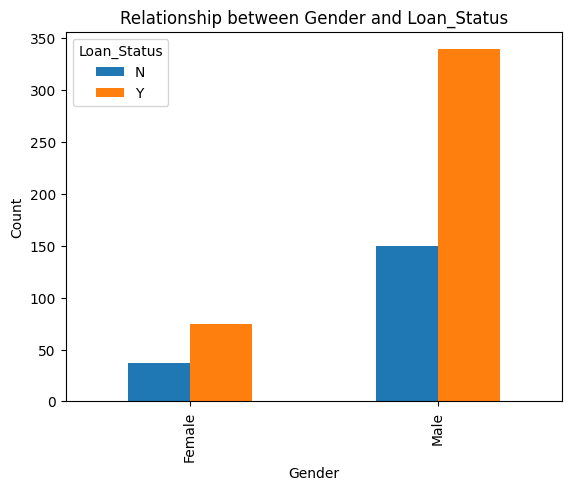

In [26]:
#Generate a contigency table (which is a cross tabulation of string data to numeric)
crosstab = pd.crosstab(index = loan['Gender'], columns= loan['Loan_Status'])

#Use contigeny table to generate barplot
%matplotlib inline
crosstab.plot.bar()

#Add title and axes labels to barplot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Loan_Status')

**B. Check relationship using correlation test (chisquare)**

In [15]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     0.13963
p-value:            0.70865
degrees of freedom: 1
expected frequencies:
 [[ 34.84858569  77.15141431]
 [152.15141431 336.84858569]]


**C. Alternatively look at the association between the variables**

In [18]:
#Subset data to include only Gender and Loan_Status
loan2=loan[["Gender", "Loan_Status"]]
loan2

,Gender,Loan_Status
0,Male,Y
1,Male,N
2,Male,Y
3,Male,Y
4,Male,Y
...,...,...
609,Female,Y
610,Male,Y
611,Male,Y
612,Male,Y


In [20]:
#Import library for Crammer's V
import association_metrics as am

# Convert object variables to Category columns
loan3 = loan2.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

In [21]:
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(loan3)

In [22]:
#Generate the cramer's v results
cfit = cramers_v.fit().round(2)
cfit

,Gender,Loan_Status
Gender,1.00,0.02
Loan_Status,0.02,1.00


In [24]:
import matplotlib.pyplot as plt

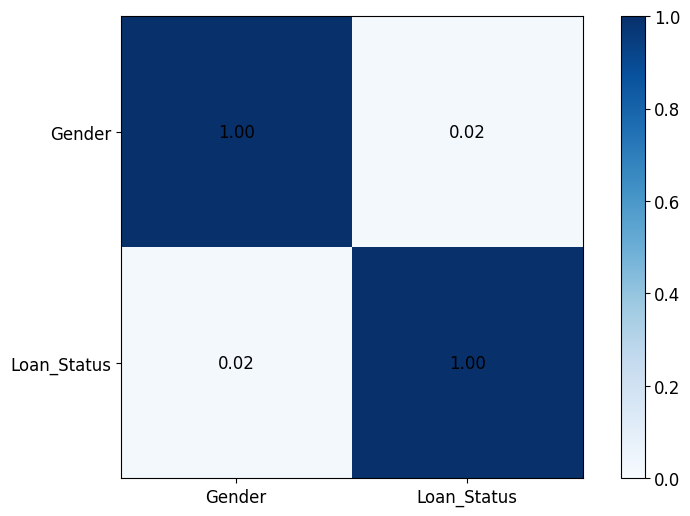

In [25]:
#To generate a pairwise association plot
# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (10, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 0)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

            Explanation:
* The graph shows that there are more male than female applicants. It also shows that the number of Yeses are more than rejections (N) for both genders

* The Chi-Square statistic ranges from zero to infinity. The more associated two variables are, the larger the Chi-Square statistic will be

* However, there's no statistical correlation between the variables Gender and Loan_Status (chi2 = 0.1396, p = 0.7086) implying the yeses and no's aren't based on gender of an applicant.

* Cramer’s V ranges from 0 to 1, where 0 indicates no relationship and 1 indicates a strong association. Therefore there's a very small association between Gender and Loan_Status (V=0.02)
*  It is calculated as:

Cramer’s V = √(X2/n) / min(c-1, r-1)

where:

X2: The Chi-square statistic
n: Total sample size
r: Number of rows
c: Number of columns

![Alt text](image.png)
